<a href="https://colab.research.google.com/github/Apoo05/Introduction-au-deep-learning/blob/main/006_ca1_ann_q1%2C2%2C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1**

In [ ]:
#mounting drive to load data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers
df=pd.read_csv('/content/drive/MyDrive/ca_deep_learning/weatherAUS.csv')

In [ ]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,06-12-2008,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,07-12-2008,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,08-12-2008,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,09-12-2008,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,10-12-2008,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [ ]:
#preprocessing
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['WindGustDir']= label_encoder.fit_transform(df['WindGustDir'])
df['WindDir9am']= label_encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm']= label_encoder.fit_transform(df['WindDir3pm'])
df['RainToday']= label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow']= label_encoder.fit_transform(df['RainTomorrow'])

In [ ]:
#Imputating missing values
df_num=df.select_dtypes(exclude=['object'])
from sklearn.impute import SimpleImputer
df1=df_num.copy()
impute=SimpleImputer(strategy='mean')
df1.iloc[:,:]=impute.fit_transform(df_num)

<ipython-input-8-4438fecd03c6>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df1.iloc[:,:]=impute.fit_transform(df_num)


In [ ]:
#normalizing values
from sklearn import preprocessing
df_n=df1.copy()
df_n.iloc[:,:]=preprocessing.normalize(df1)

In [ ]:
df1.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object

For preprocessing, normalization, imputation and label encoding was done.

**Question 2**

In [ ]:
#assigning target variable and features to x and y
x = df_n.drop('RainTomorrow', axis=1)
y = df_n['RainTomorrow']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)

In [ ]:
#ANN model
model = Sequential()
model.add(Dense(7, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#training model
history1 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128, verbose=1)

Epoch 1/10
910/910 [==============================] - 9s 4ms/step - loss: 0.1655 - accuracy: 0.7346 - val_loss: 0.0202 - val_accuracy: 0.7584
Epoch 2/10
910/910 [==============================] - 4s 4ms/step - loss: 0.0102 - accuracy: 0.7584 - val_loss: 0.0053 - val_accuracy: 0.7584
Epoch 3/10
910/910 [==============================] - 3s 4ms/step - loss: 0.0038 - accuracy: 0.7584 - val_loss: 0.0029 - val_accuracy: 0.7584
Epoch 4/10
910/910 [==============================] - 3s 4ms/step - loss: 0.0024 - accuracy: 0.7584 - val_loss: 0.0021 - val_accuracy: 0.7584
Epoch 5/10
910/910 [==============================] - 3s 3ms/step - loss: 0.0020 - accuracy: 0.7584 - val_loss: 0.0019 - val_accuracy: 0.7584
Epoch 6/10
910/910 [==============================] - 4s 5ms/step - loss: 0.0018 - accuracy: 0.7584 - val_loss: 0.0018 - val_accuracy: 0.7584
Epoch 7/10
910/910 [==============================] - 3s 3ms/step - loss: 0.0018 - accuracy: 0.7584 - val_loss: 0.0018 - val_accuracy: 0.7584
Epoch 

The validation accuracy of the ann model is 75% for the given data.

**question 3**

In [ ]:
from keras import regularizers
modelr = Sequential()
modelr.add(Dense(100, input_dim=x_train.shape[1], activation='relu',kernel_regularizer=regularizers.L1L2(l1=0.0001,l2=0.001)))
modelr.add(Dense(1, activation='sigmoid',activity_regularizer=regularizers.L2(1e-5)))
modelr.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history2 = modelr.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=101, verbose=1)

Epoch 1/10
1153/1153 [==============================] - 6s 4ms/step - loss: 0.0501 - accuracy: 0.7540 - val_loss: 0.0049 - val_accuracy: 0.7584
Epoch 2/10
1153/1153 [==============================] - 7s 6ms/step - loss: 0.0036 - accuracy: 0.7584 - val_loss: 0.0027 - val_accuracy: 0.7584
Epoch 3/10
1153/1153 [==============================] - 5s 5ms/step - loss: 0.0022 - accuracy: 0.7584 - val_loss: 0.0019 - val_accuracy: 0.7584
Epoch 4/10
1153/1153 [==============================] - 4s 4ms/step - loss: 0.0018 - accuracy: 0.7584 - val_loss: 0.0018 - val_accuracy: 0.7584
Epoch 5/10
1153/1153 [==============================] - 5s 5ms/step - loss: 0.0018 - accuracy: 0.7584 - val_loss: 0.0018 - val_accuracy: 0.7584
Epoch 6/10
1153/1153 [==============================] - 4s 4ms/step - loss: 0.0018 - accuracy: 0.7584 - val_loss: 0.0018 - val_accuracy: 0.7584
Epoch 7/10
1153/1153 [==============================] - 4s 4ms/step - loss: 0.0018 - accuracy: 0.7584 - val_loss: 0.0018 - val_accuracy:

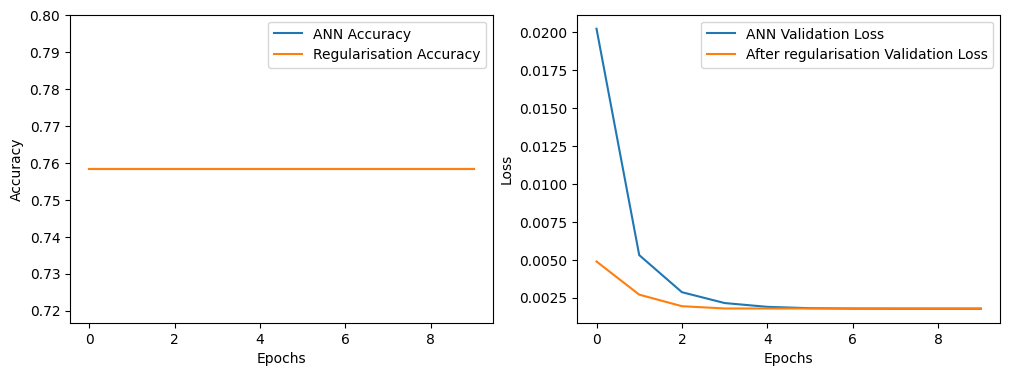

In [ ]:
#Question 6 comparing
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['val_accuracy'], label='ANN Accuracy')
plt.plot(history2.history['val_accuracy'], label='Regularisation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history1.history['val_loss'], label='ANN Validation Loss')
plt.plot(history2.history['val_loss'], label='After regularisation Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The loss graph between the two models shows clear difference with regularisation. It shows lower loss when L1 and L2 techniques were applied. The accuracy doesnt have any significant difference.